# Module 10: Logscale

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import vega_datasets
%matplotlib inline

## Ratio and logarithm

If you use linear scale to visualize ratios, it can be quite misleading.

Let's first create some ratios.

In [2]:
x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


**Q: Plot on the linear scale using the [`scatter()`](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function. Also draw a horizontal line at ratio=1 for a reference. **

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

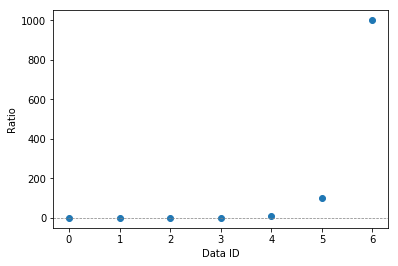

In [3]:
# Implement
plt.scatter(np.arange(7),ratio)
plt.xlabel('Data ID')
plt.ylabel('Ratio')
plt.axhline(y=1, linestyle ='--', color='grey',linewidth=0.7)
ratio

**Q: Explain what's bad about this plot.**

1.e-03, 1.e-02, 1.e-01 are  so small that it appears as zero 


**Q: Can you fix it? **

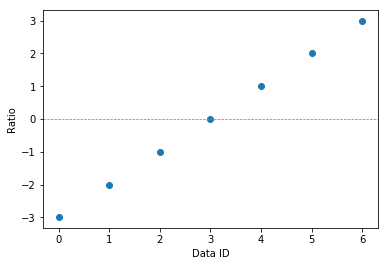

In [4]:
# Implement
#taking log of the ratios
# horizontal line at 0

plt.scatter(np.arange(7),np.log10(ratio))
plt.xlabel('Data ID')
plt.ylabel('Ratio')
plt.axhline(y=0, linestyle ='--', color='grey',linewidth=0.7)


## Log-binning

Let's first see what happens if we do not use the log scale for a dataset with a heavy tail. 

**Q: Load the movie dataset from `vega_datasets` and remove the NaN rows based on the following three columns: `IMDB_Rating`, `IMDB_Votes`, `Rotten_Tomatoes_Rating`. **

In [5]:
# Implement
#IMDB_Rating, IMDB_Votes, Rotten_Tomatoes_Rating
from vega_datasets import data
movies = data.movies()
movies1 = movies.dropna(subset = ['IMDB_Rating', 'IMDB_Votes', 'Rotten_Tomatoes_Rating'])
movies1

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,9-Oct-98,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0
8,None,Roman Polanski,None,5.8,3275.0,R,None,40000000.0,1-Jul-86,25.0,NaN,None,Pirates,NaN,1641825.0,6341825.0
9,None,None,None,7.0,2906.0,None,None,6000000.0,31-Dec-46,86.0,NaN,None,Duel in the Sun,NaN,20400000.0,20400000.0
10,None,None,None,7.0,4035.0,None,None,1000000.0,7-Oct-63,81.0,NaN,None,Tom Jones,NaN,37600000.0,37600000.0
11,None,None,Sony Pictures,7.5,9111.0,None,Musical,10000000.0,11-Dec-68,84.0,NaN,None,Oliver!,NaN,37402877.0,37402877.0
12,None,None,Universal,8.4,82786.0,None,None,2000000.0,25-Dec-62,97.0,NaN,None,To Kill A Mockingbird,NaN,13129846.0,13129846.0
14,None,None,None,6.8,1532.0,None,None,100000.0,1-Mar-87,87.0,NaN,None,Hollywood Shuffle,NaN,5228617.0,5228617.0
18,None,None,None,2.5,1677.0,None,None,13500000.0,5-Oct-56,90.0,NaN,None,The Ten Commandments,NaN,80000000.0,80000000.0
21,Historical Fiction,None,Sony/Columbia,7.0,4099.0,PG,Drama,4000000.0,9-Nov-72,57.0,NaN,Based on Play,1776,NaN,0.0,0.0
22,Historical Fiction,Steven Spielberg,Universal,5.6,13364.0,None,Comedy,32000000.0,14-Dec-79,33.0,NaN,Original Screenplay,1941,NaN,34175000.0,94875000.0


If you simply call `hist()` method with a dataframe object, it identifies all the numeric columns and draw a histogram for each. 

**Q: draw all possible histograms of the movie dataframe. Adjust the size of the plots if needed. **

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002449638A3C8>,
      dtype=object)

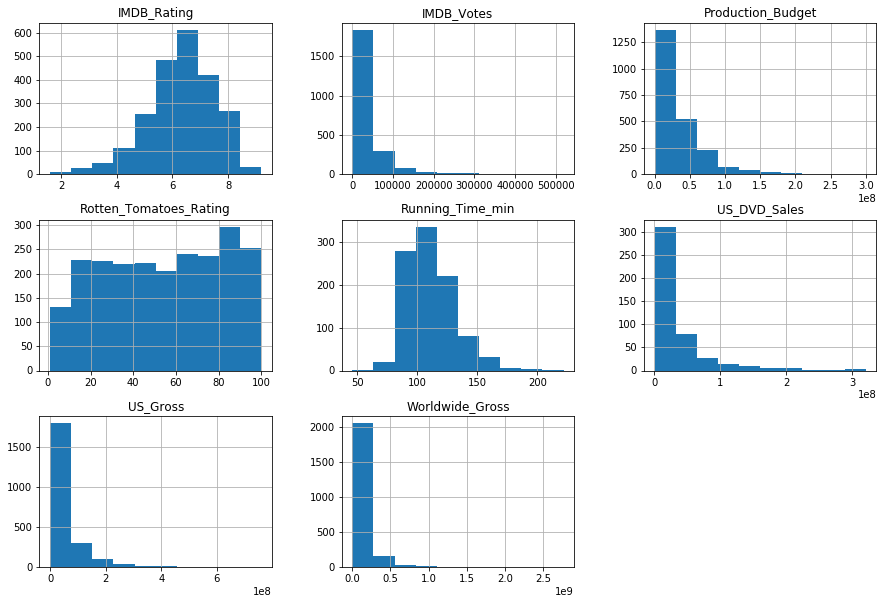

In [6]:
# Implement
movies1.hist(figsize=(15,10))

As we can see, a majority of the columns are not normally distributed. In particular, if you look at the worldwide gross variable, you only see a couple of meaningful data from the histogram. Is this a problem of resolution? How about increasing the number of bins?

**Q: Play with the number of bins, and then increase the number of bins to 200. **

Text(0,0.5,'Frequency')

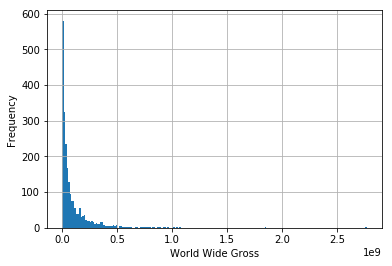

In [7]:
# Implement
movies1['Worldwide_Gross'].hist(bins=200)
plt.xlabel('World Wide Gross')
plt.ylabel('Frequency')

Maybe a bit more useful, but it doesn't tell anything about the data distribution above certain point. 

**Q: How about changing the vertical scale to logarithmic scale?**

Text(0,0.5,'Frequency')

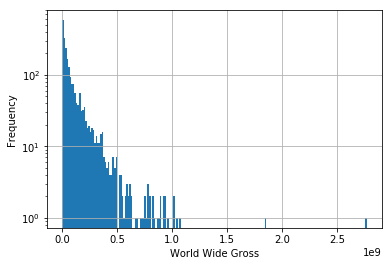

In [8]:
# Implement
plt.yscale('log')
movies1['Worldwide_Gross'].hist(bins=200)
plt.xlabel('World Wide Gross')
plt.ylabel('Frequency')

Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.


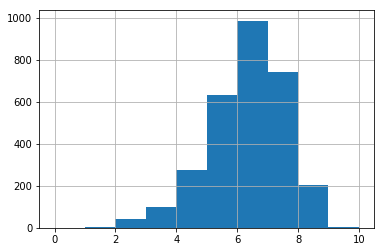

In [9]:
movies.IMDB_Rating.hist(bins=range(0,11))

Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [Google query: python log-bin](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=python+log-bin&pws=0)
* [numpy.logspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](http://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}} = \text{min(Worldwide_Gross)}$, $\text{start} = \log_{10}(\text{min(Worldwide_Gross)})$

In [10]:
min(movies.Worldwide_Gross)

0.0

Because there seems to be movie(s) that made $0, and because log(0) is undefined & log(1) = 0, let's add 1 to the variable.  

In [11]:
movies.Worldwide_Gross = movies.Worldwide_Gross+1.0

**Q: now create logarithmic bins. Create 20 bins from the minimum value to the maximum value.**

In [12]:
# Implement
MIN, MAX = min(movies.Worldwide_Gross), 1000000000
bins = 10 ** np.linspace(np.log10(MIN)-2, np.log10(MAX)+1, num=20)

Now we can plot a histgram with log-bin. Set both axis to be log-scale. 

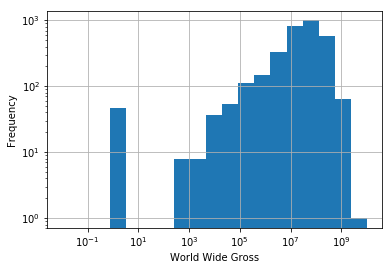

In [13]:
# Implement
data = (movies['Worldwide_Gross'].dropna())
plt.hist(data, bins= bins)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('World Wide Gross')
plt.ylabel('Frequency')
plt.grid()
plt.show()

What is going on? Is this the right plot?

**Q: explain and fix**

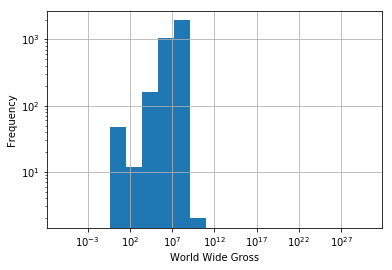

In [14]:
# Increased the factor to 1000 and the gaps are gone


MIN, MAX = min(movies.Worldwide_Gross), 1000000000
bins = 1000 ** np.linspace(np.log10(MIN)-2, np.log10(MAX)+1, num=20)
data = (movies['Worldwide_Gross'].dropna())
plt.hist(data, bins= bins)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('World Wide Gross')
plt.ylabel('Frequency')
plt.grid()
plt.show()


**Q: Can you explain the plot? Why are there gaps?**

Because there are no movies whose world wide gross is such that its log is only 10 or 100 which iks very less for a big movie

## CCDF

CCDF is a nice alternative to examine distributions with heavy tails. The idea is same as CDF, but the direction of aggregation is opposite. We have done CDF before. It's just a small change to that code. 

**Q: Draw a CCDF in log-log scale**

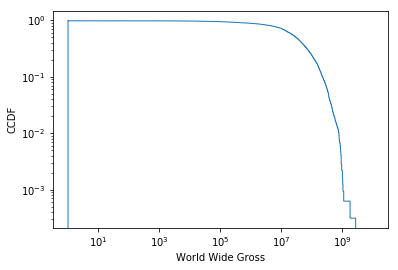

In [15]:
# implement 
from statsmodels.distributions.empirical_distribution import ECDF
MIN, MAX = min(movies.Worldwide_Gross), 1000000000
bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX)+1, num=1200)
data = (movies['Worldwide_Gross'].dropna())

plt.hist(data, bins= bins,cumulative=-1, histtype='step',density=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('World Wide Gross')
plt.ylabel('CCDF')
plt.show()


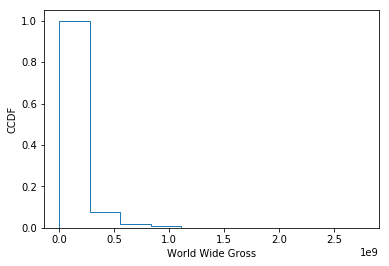

In [16]:
# implement 
from statsmodels.distributions.empirical_distribution import ECDF
MIN, MAX = min(movies.Worldwide_Gross), 1000000000
bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX)+1, num=1200)
data = (movies['Worldwide_Gross'].dropna())

plt.hist(data,cumulative=-1, histtype='step',density=True)
plt.xlabel('World Wide Gross')
plt.ylabel('CCDF')
plt.show()


We can also try in semilog scale (only one axis is in a log-scale), where the horizontal axis is linear. 

**Q: Draw a CCDF in semilog scale**

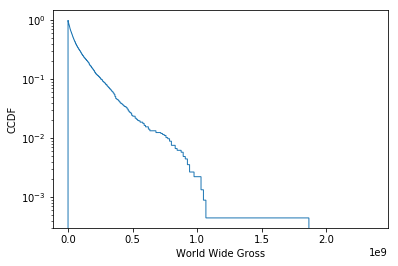

In [36]:
# Implement
MIN, MAX = min(movies.Worldwide_Gross), 1000000000
bins = 11 ** np.linspace(np.log10(MIN), np.log10(MAX), num=1200)
data = (movies1['Worldwide_Gross'].dropna())

plt.hist(data, bins= bins,cumulative=-1, histtype='step',density=True)
plt.yscale('log')
plt.xlabel('World Wide Gross')
plt.ylabel('CCDF')
plt.show()


A straight line in semilog scale means exponential decay (cf. a straight line in log-log scale means power-law decay). So it seems like the amount of money a movie makes across the world follows *roughly* an exponential distribution, while there are some outliers that make insane amount of money. 

**Q: Which is the most successful movie in our dataset?**

You can use the following

- `idxmax()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
- `loc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html or `iloc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html 

Which one should you use, `loc` or `iloc`? How are they different from each other?

Avatar is the most sucessful movie.

Though both iloc and loc return the same result in this case but many times they dont if some rows are dropped 
loc gets result with particular labels from the index. 
iloc gets result at particular positions in the index .

We should use loc for the accurate result since its based on id and idx returns id of the row

In [37]:
# Implement
movies.iloc[movies['Worldwide_Gross'].idxmax()]

Creative_Type                 Science Fiction
Director                        James Cameron
Distributor                  20th Century Fox
IMDB_Rating                               8.3
IMDB_Votes                             261439
MPAA_Rating                             PG-13
Major_Genre                            Action
Production_Budget                    2.37e+08
Release_Date                        18-Dec-09
Rotten_Tomatoes_Rating                     83
Running_Time_min                          NaN
Source                    Original Screenplay
Title                                  Avatar
US_DVD_Sales                      1.46154e+08
US_Gross                          7.60168e+08
Worldwide_Gross                   2.76789e+09
Name: 1234, dtype: object

In [38]:
movies.loc[movies['Worldwide_Gross'].idxmax()]

Creative_Type                 Science Fiction
Director                        James Cameron
Distributor                  20th Century Fox
IMDB_Rating                               8.3
IMDB_Votes                             261439
MPAA_Rating                             PG-13
Major_Genre                            Action
Production_Budget                    2.37e+08
Release_Date                        18-Dec-09
Rotten_Tomatoes_Rating                     83
Running_Time_min                          NaN
Source                    Original Screenplay
Title                                  Avatar
US_DVD_Sales                      1.46154e+08
US_Gross                          7.60168e+08
Worldwide_Gross                   2.76789e+09
Name: 1234, dtype: object